In [49]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')

In [50]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
sns.set_context('poster')

In [52]:
ppallete = "BuGn"
porder = ['MIT9313', 'Natl2A', 'C9B', 'MIT9312', 'MED4']
pedge = 'green'
apallete = "Oranges"
aorder = ['1A3', 'DE', 'DE1', 'ATCC', 'BS11']
aedge='orange'              

In [53]:
data_dpath = r'D:\Users\Osnat\Documents\GitHub\ccpa\platedata'
csv_fnames = [ n for n in os.listdir(data_dpath) if n.endswith('.csv')]


In [54]:
def _load_plate_csv(data_dpath, fname):
    df = pd.read_csv(os.path.join(data_dpath, fname), index_col=0, header=None).T
    #df = df.reset_index()
    df['Sample'] = os.path.splitext(fname)[0]
    df = df.melt(id_vars=[ 'Sample', 'PRO', 'ALT', 'Day'],
        value_vars=['N', 'P', 'TMM', 'N+P+TMM', 'Control ', 'Transfer to Pro99 1:15'],
        value_name='FL',
        var_name ='Mode')
    return df

In [55]:
temp_dfs = [_load_plate_csv(data_dpath, fname) for fname in csv_fnames]
df = pd.concat(temp_dfs)
df.FL = pd.to_numeric(df.FL)
df.Day = pd.to_numeric(df.Day)
df.loc[df.FL < 100, 'FL'] = 0

In [56]:
df.shape

(20010, 6)

In [57]:
df[df.ALT.isna()]['Sample'].unique()

array(['36A', '36B'], dtype=object)

In [58]:
df = df.fillna({'ALT': 'N/A'}, )

In [59]:
df.head()

,Sample,PRO,ALT,Day,Mode,FL
0,10A,MIT0604,DE,0,N,0
1,10A,MIT0604,DE,1,N,0
2,10A,MIT0604,DE,5,N,0
3,10A,MIT0604,DE,6,N,0
4,10A,MIT0604,DE,7,N,0


In [12]:
df.dtypes

Sample    object
PRO       object
ALT       object
Day        int64
Mode      object
FL         int64
dtype: object

In [13]:
df.isna().sum()

Sample    0
PRO       0
ALT       0
Day       0
Mode      0
FL        0
dtype: int64

In [14]:
df['Mode'].unique()

array(['N', 'P', 'TMM', 'N+P+TMM', 'Control ', 'Transfer to Pro99 1:15'],
      dtype=object)

In [15]:
df['PRO'].unique()

array(['MIT0604', 'MED4', 'MIT9313', 'MIT9312', 'NATL2A', 'ALL_PRO',
       'ALL'], dtype=object)

In [16]:
df['ALT'].unique()

array(['DE', 'DE1', 'BS11', '1A3', 'ATCC', 'N/A', 'ALL'], dtype=object)

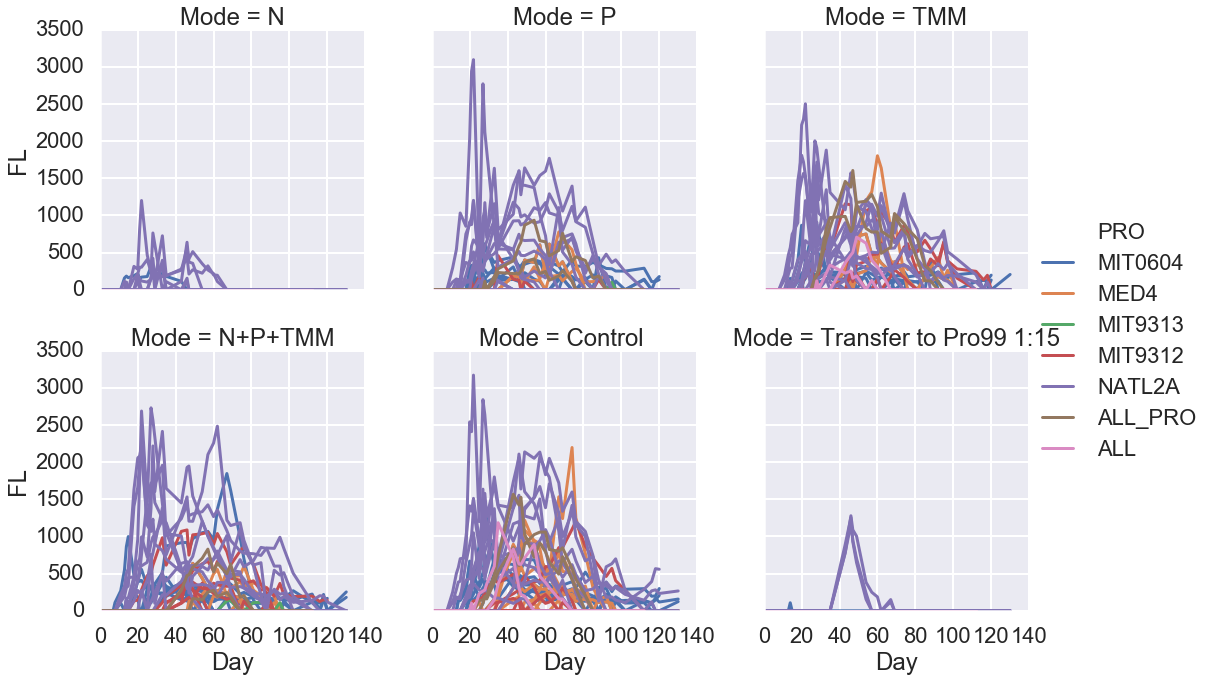

In [17]:
sns.relplot(data=df, col='Mode', hue='PRO',x='Day', y='FL', kind='line', estimator=None, units='Sample', col_wrap=3)

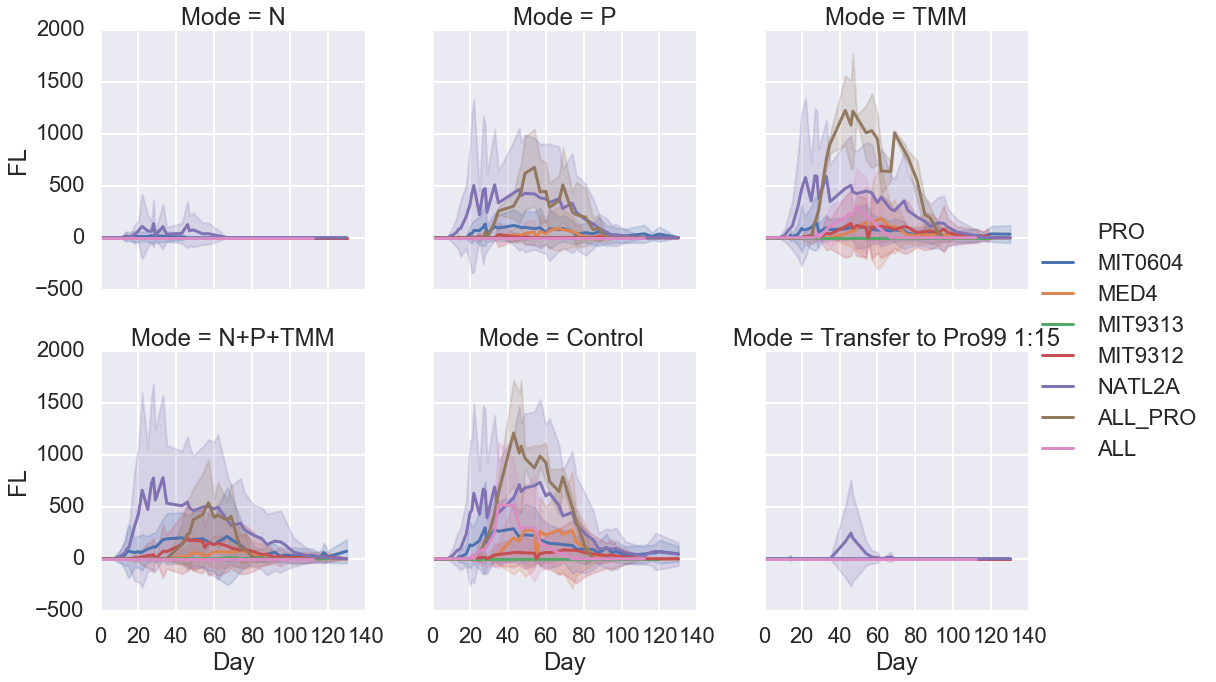

In [18]:
sns.relplot(data=df, col='Mode', hue='PRO',x='Day', y='FL', kind='line', ci='sd',col_wrap=3)

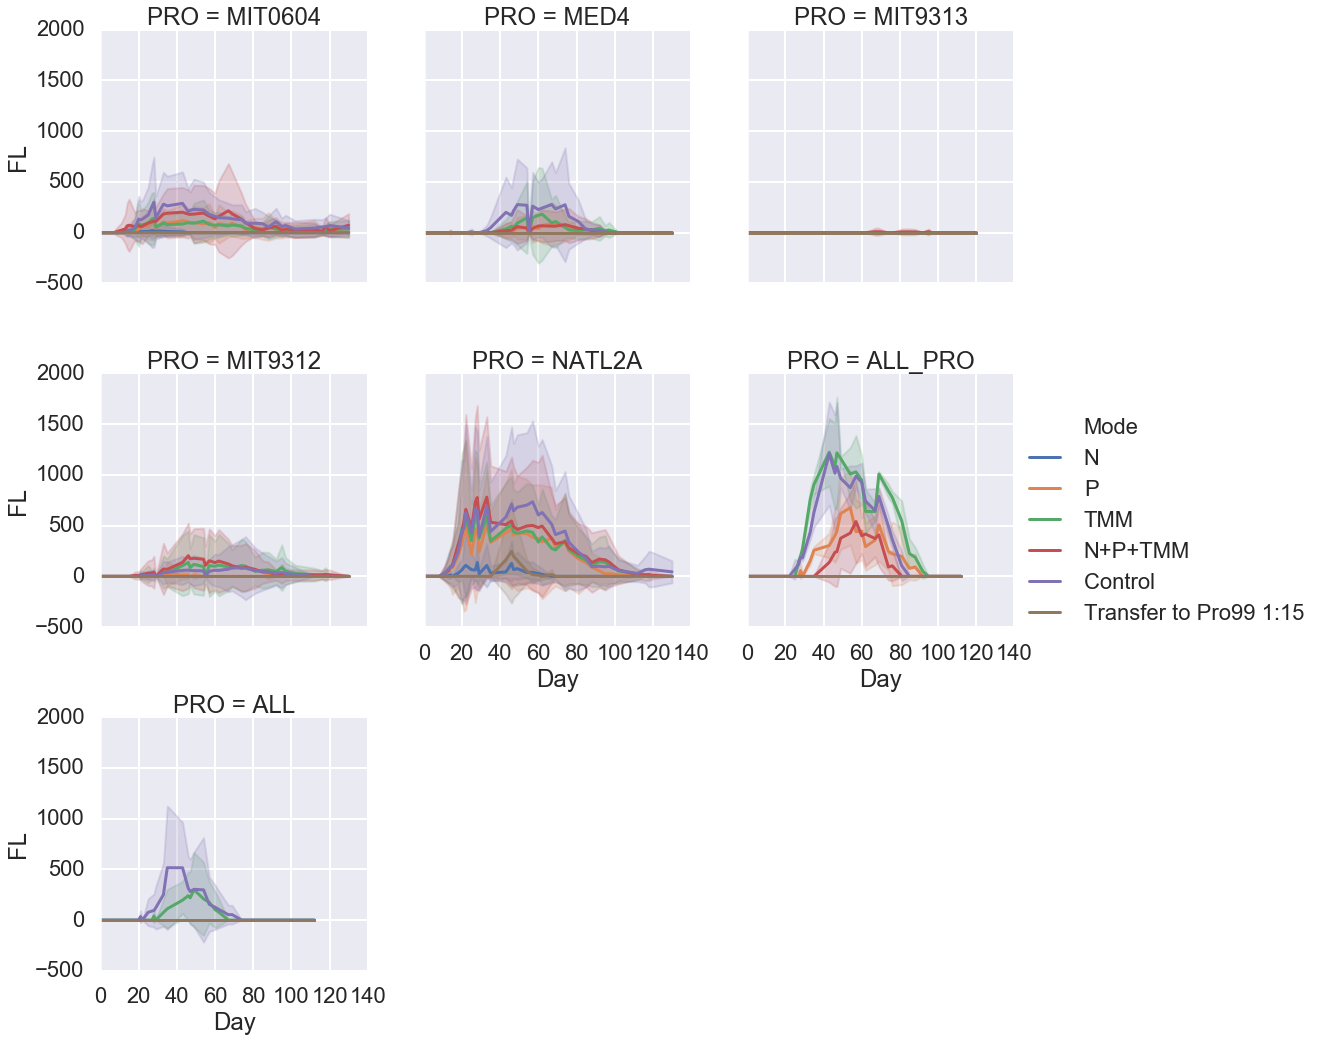

In [19]:
sns.relplot(data=df, hue='Mode', col='PRO',x='Day', y='FL', kind='line', ci='sd',col_wrap=3)

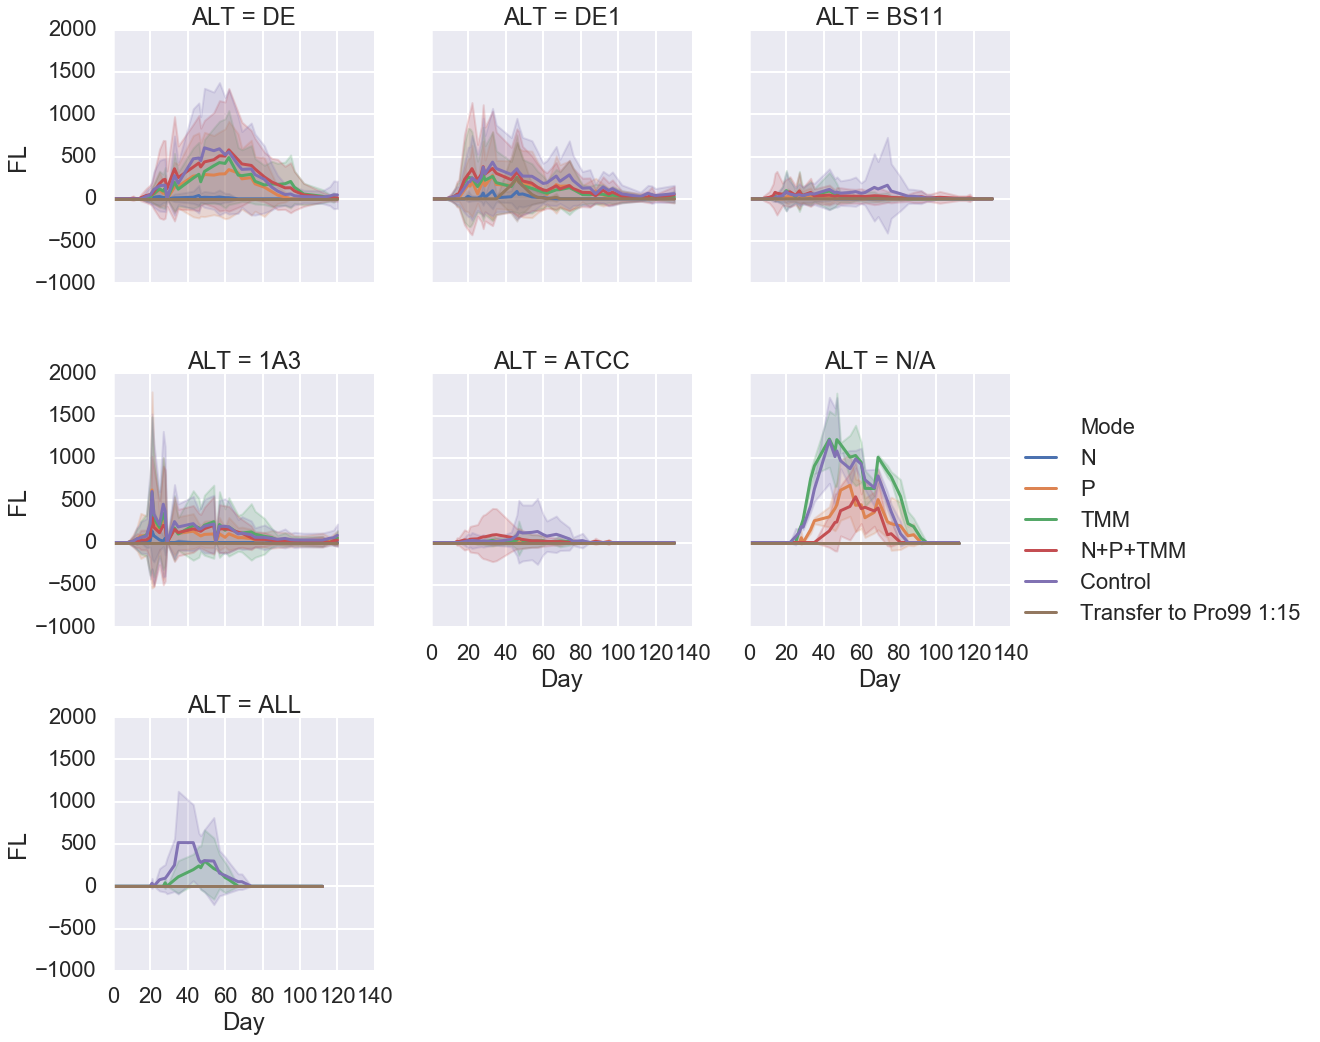

In [20]:
sns.relplot(data=df, hue='Mode', col='ALT', x='Day', y='FL', kind='line', ci='sd',col_wrap=3)

In [21]:
df.head()

,Sample,PRO,ALT,Day,Mode,FL
0,10A,MIT0604,DE,0,N,0
1,10A,MIT0604,DE,1,N,0
2,10A,MIT0604,DE,5,N,0
3,10A,MIT0604,DE,6,N,0
4,10A,MIT0604,DE,7,N,0


In [22]:
m = df.groupby(['Sample', 'PRO', 'ALT', 'Mode'])['FL'].max()
m = m.reset_index()
m.head()

,Sample,PRO,ALT,Mode,FL
0,10A,MIT0604,DE,Control,0
1,10A,MIT0604,DE,N,0
2,10A,MIT0604,DE,N+P+TMM,0
3,10A,MIT0604,DE,P,0
4,10A,MIT0604,DE,TMM,0


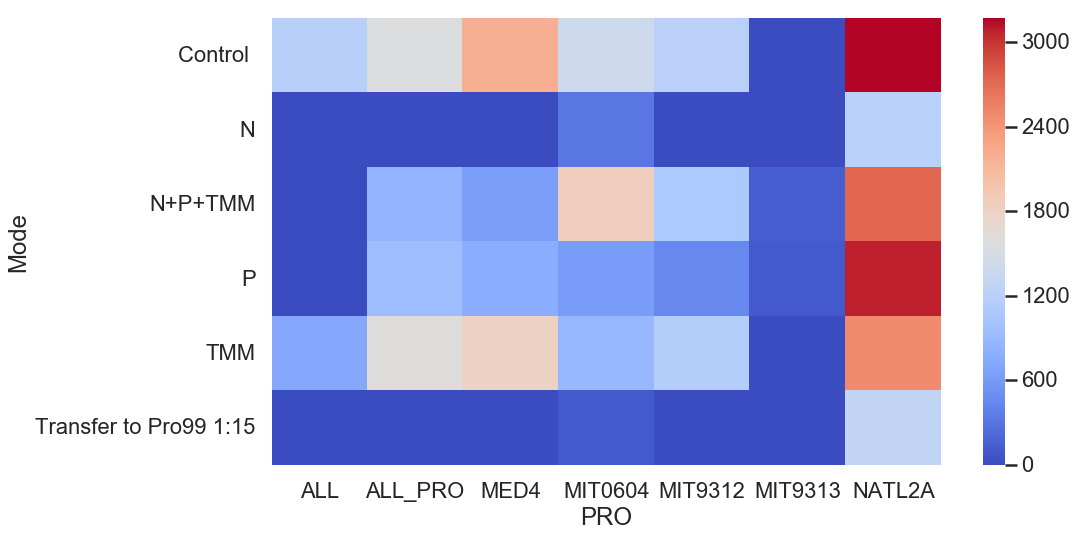

In [61]:
idx = ['PRO']
p=m.pivot_table(columns=idx, index=['Mode'], values=['FL'], aggfunc='max')
p.columns = p.columns.get_level_values(1)

sns.heatmap(p, cmap='coolwarm')

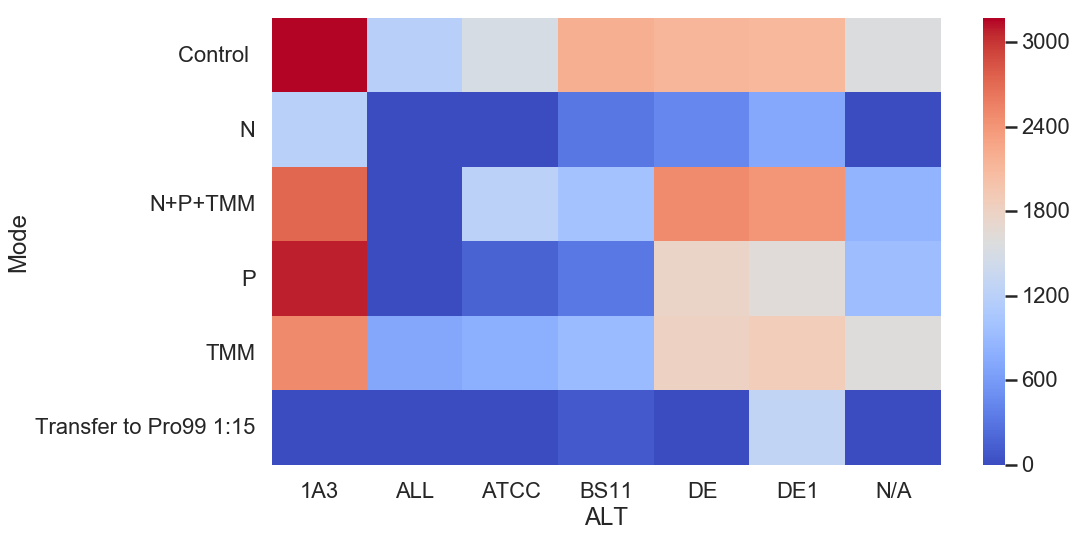

In [74]:
idx = ['ALT']
p=m.pivot_table(columns=idx, index=['Mode'], values=['FL'], aggfunc='max')
p.columns = p.columns.get_level_values(1)

sns.heatmap(p, cmap='coolwarm')

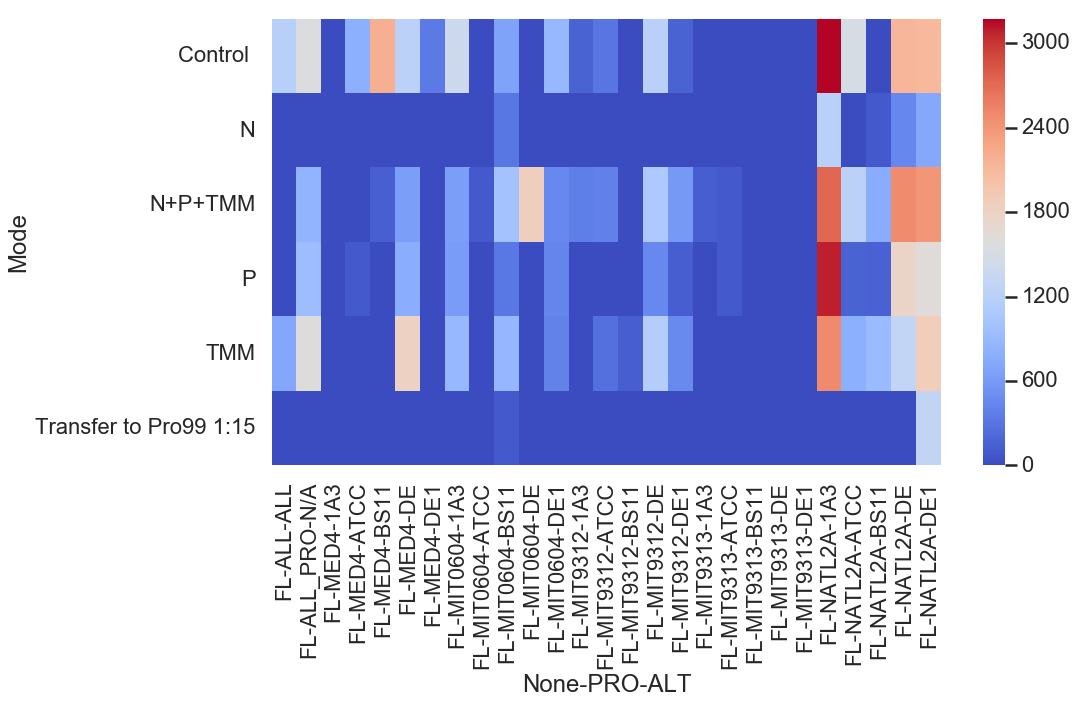

In [66]:
idx = ['ALT']
#p=m.pivot_table(columns=idx, index=['Mode'], values=['FL'], aggfunc='max')
#p.columns = p.columns.get_level_values(1)

sns.heatmap(p, cmap='coolwarm')

In [65]:
idx = ['PRO','ALT']
p=m.pivot_table(columns=idx, index=['Mode'], values=['FL'], aggfunc='max')
p.columns
p.columns = p.columns.get_level_values([1,2])

#sns.heatmap(p, cmap='coolwarm')

MultiIndex(levels=[['FL'], ['ALL', 'ALL_PRO', 'MED4', 'MIT0604', 'MIT9312', 'MIT9313', 'NATL2A'], ['1A3', 'ALL', 'ATCC', 'BS11', 'DE', 'DE1', 'N/A']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6], [1, 6, 0, 2, 3, 4, 5, 0, 2, 3, 4, 5, 0, 2, 3, 4, 5, 0, 2, 3, 4, 5, 0, 2, 3, 4, 5]],
           names=[None, 'PRO', 'ALT'])

In [25]:
df.head()

,Sample,PRO,ALT,Day,Mode,FL
0,10A,MIT0604,DE,0,N,0
1,10A,MIT0604,DE,1,N,0
2,10A,MIT0604,DE,5,N,0
3,10A,MIT0604,DE,6,N,0
4,10A,MIT0604,DE,7,N,0


In [69]:
df['experiment_sample'] = df.Mode + ', '+ df.Sample

In [27]:
p.head()

ALT,1A3,ALL,ATCC,BS11,DE,DE1,N/A
Mode,,,,,,,
Control,3171,1185,1505,2197,2138,2109,1568
N,1201,0,0,312,439,726,0
N+P+TMM,2731,0,1221,999,2484,2414,830
P,3096,0,172,328,1769,1635,935
TMM,2502,708,783,906,1803,1879,1605


In [28]:
X = cp.experiments2X(df, sample_col='experiment_sample', value_col='FL', x_col='Day',cumsummode=False)
X.head()

#sns.clustermap(data=p)

Day,0,1,5,6,7,8,11,13,14,15,...,88,92,95,97,102,112,116,118,120,130
experiment_sample,,,,,,,,,,,,,,,,,,,,,
"Control , 10A",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Control , 10B",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Control , 10C",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Control , 11A",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Control , 11B",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,149.0,194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
X.index

Index(['Control , 10A', 'Control , 10B', 'Control , 10C', 'Control , 11A',
       'Control , 11B', 'Control , 11C', 'Control , 12A', 'Control , 12B',
       'Control , 12C', 'Control , 13A',
       ...
       'Transfer to Pro99 1:15, 6C', 'Transfer to Pro99 1:15, 7A',
       'Transfer to Pro99 1:15, 7B', 'Transfer to Pro99 1:15, 7C',
       'Transfer to Pro99 1:15, 8A', 'Transfer to Pro99 1:15, 8B',
       'Transfer to Pro99 1:15, 8C', 'Transfer to Pro99 1:15, 9A',
       'Transfer to Pro99 1:15, 9B', 'Transfer to Pro99 1:15, 9C'],
      dtype='object', name='experiment_sample', length=480)

In [30]:
X1 = X[(X != 0).any(1)]

In [70]:
metadf = cp.get_meta(df, meta_col=['experiment_sample', 'Mode','Sample', 'PRO', 'ALT'])
metadf = metadf.loc[metadf.experiment_sample.isin(X1.index)]
metadf.index = metadf['experiment_sample']
col = 'Mode'
lut = dict(zip(metadf[col].unique(), sns.color_palette('Set2', n_colors=metadf[col].nunique())))
row_colors = metadf[col].map(lut)

# col = 'PRO'
# lut = dict(zip(metadf[col].unique(), sns.color_palette('Set2', n_colors=metadf[col].nunique())))
# row_colors2 = metadf[col].map(lut)



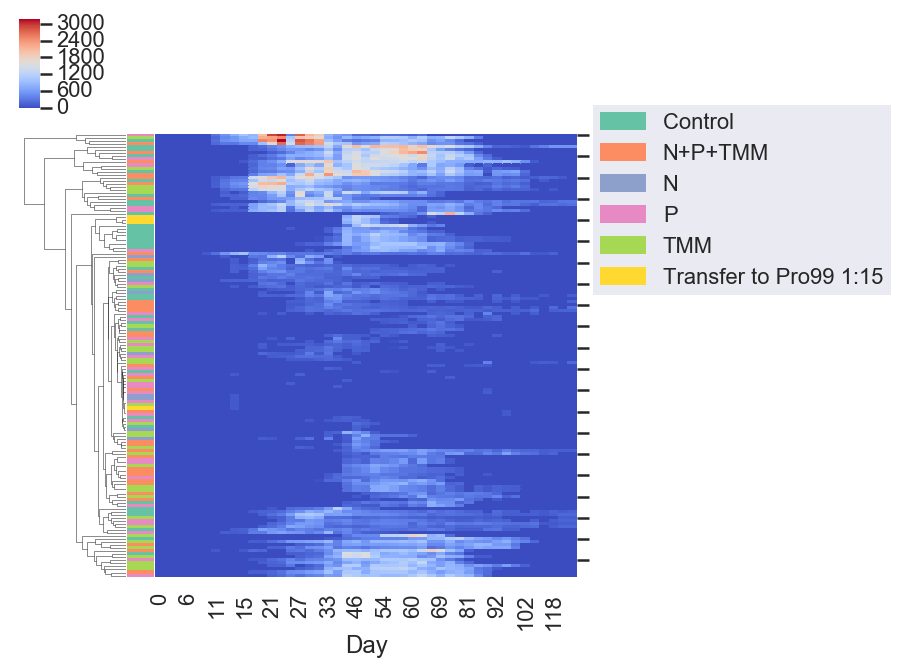

In [71]:
import matplotlib.patches as mpatches
g = sns.clustermap(data=X1, col_cluster=False, #row_cluster=False,
                   cmap="coolwarm", 
                   row_colors=[row_colors, #row_colors2
                              ], 
                  )
g.ax_heatmap.set_yticklabels('')
g.ax_heatmap.set_ylabel('')
legend_TN = [mpatches.Patch(color=c, label=l) for l,c in lut.items()]
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)


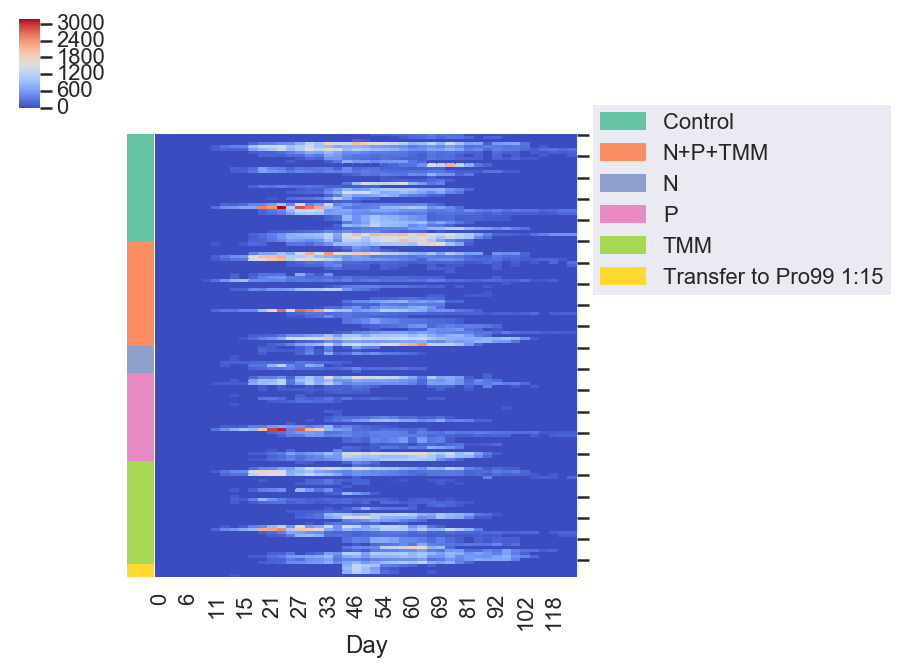

In [72]:
import matplotlib.patches as mpatches
g = sns.clustermap(data=X1, col_cluster=False, row_cluster=False,
                   cmap="coolwarm", 
                   row_colors=[row_colors, #row_colors2
                              ], 
                  )
g.ax_heatmap.set_yticklabels('')
g.ax_heatmap.set_ylabel('')
legend_TN = [mpatches.Patch(color=c, label=l) for l,c in lut.items()]
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)


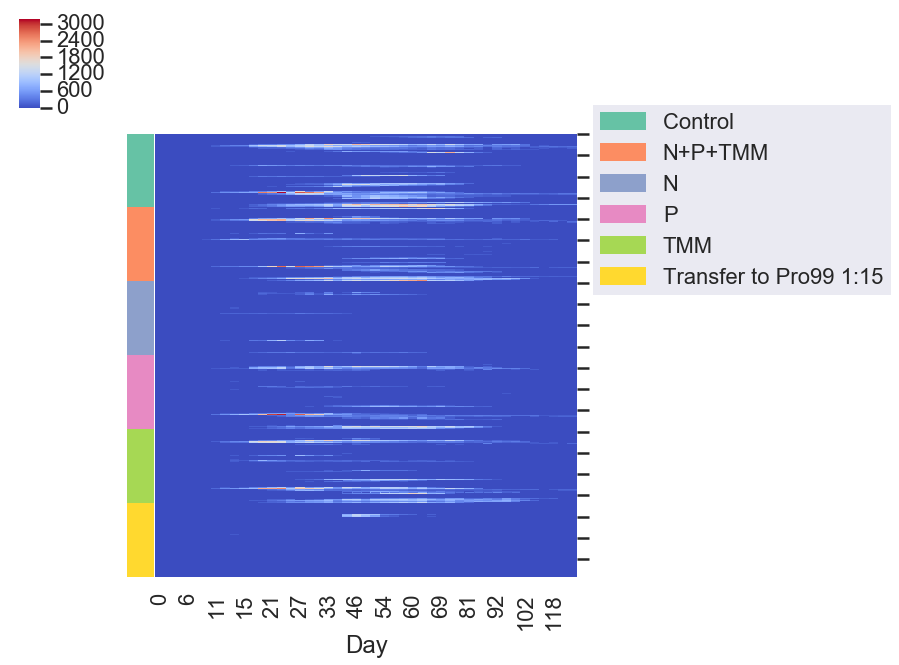

In [73]:
metadf = cp.get_meta(df, meta_col=['experiment_sample', 'Mode','Sample', 'PRO', 'ALT'])
#metadf = metadf.loc[metadf.experiment_sample.isin(X1.index)]
metadf.index = metadf['experiment_sample']
col = 'Mode'
lut = dict(zip(metadf[col].unique(), sns.color_palette('Set2', n_colors=metadf[col].nunique())))
row_colors = metadf[col].map(lut)
import matplotlib.patches as mpatches
g = sns.clustermap(data=X, col_cluster=False, row_cluster=False,
                   cmap="coolwarm", 
                   row_colors=[row_colors, #row_colors2
                              ], 
                  )
g.ax_heatmap.set_yticklabels('')
g.ax_heatmap.set_ylabel('')
legend_TN = [mpatches.Patch(color=c, label=l) for l,c in lut.items()]
l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)


In [36]:
print(X1.sort_index().index)

Index(['Control , 11A', 'Control , 11B', 'Control , 13B', 'Control , 14A',
       'Control , 14B', 'Control , 14C', 'Control , 15A', 'Control , 15B',
       'Control , 15C', 'Control , 16B',
       ...
       'TMM, 6C', 'TMM, 8B', 'TMM, 8C', 'TMM, 9A', 'TMM, 9B', 'TMM, 9C',
       'Transfer to Pro99 1:15, 14A', 'Transfer to Pro99 1:15, 14B',
       'Transfer to Pro99 1:15, 14C', 'Transfer to Pro99 1:15, 20B'],
      dtype='object', name='experiment_sample', length=146)


In [37]:
X.sort_index().index

Index(['Control , 10A', 'Control , 10B', 'Control , 10C', 'Control , 11A',
       'Control , 11B', 'Control , 11C', 'Control , 12A', 'Control , 12B',
       'Control , 12C', 'Control , 13A',
       ...
       'Transfer to Pro99 1:15, 6C', 'Transfer to Pro99 1:15, 7A',
       'Transfer to Pro99 1:15, 7B', 'Transfer to Pro99 1:15, 7C',
       'Transfer to Pro99 1:15, 8A', 'Transfer to Pro99 1:15, 8B',
       'Transfer to Pro99 1:15, 8C', 'Transfer to Pro99 1:15, 9A',
       'Transfer to Pro99 1:15, 9B', 'Transfer to Pro99 1:15, 9C'],
      dtype='object', name='experiment_sample', length=480)

In [38]:
df = pd.read_pickle('CCPA.pkl.gz')

In [39]:
dfc = df.loc[(df.experiment.isin(['e3', 'e4','e5', 'e6'])) & (df.culture == 'Co_Culture')]

In [40]:
dfc = cp.update_rolling_average(dfc)
dfc.FL = dfc.roll
dfc = cp.update_calculated_fields(dfc)

In [41]:
d = dfc.loc[dfc.experiment_sample == 'e5, 18B' ]

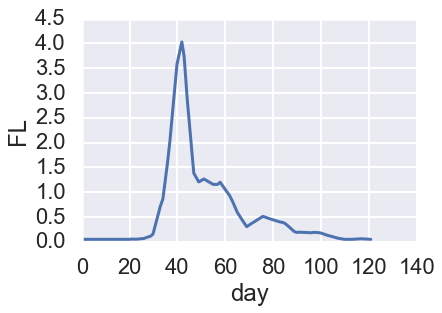

In [42]:
sns.lineplot(x = d.day, y=d.FL)

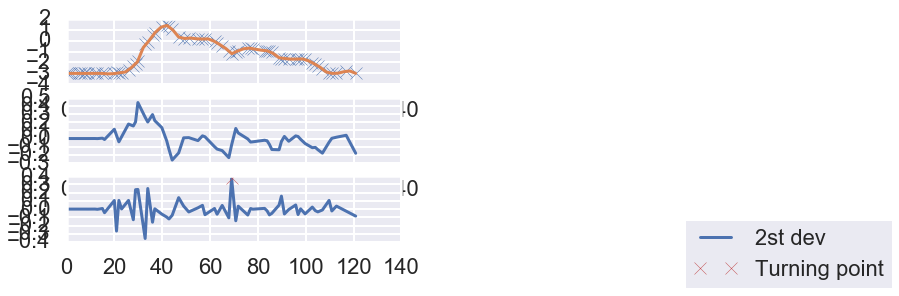

In [43]:
from scipy import interpolate
x = d.day
y = d.logFL

tck = interpolate.splrep(x, y)
xnew = np.linspace(0, np.max(x))

fig, axes = plt.subplots(3)

axes[0].plot(x, y, 'x', label = 'data')
axes[0].plot(xnew, interpolate.splev(xnew, tck, der=0), label = 'Fit')
axes[1].plot(x, interpolate.splev(x, tck, der=1), label = '1st dev')
dev_2 = interpolate.splev(x, tck, der=2)
axes[2].plot(x, dev_2, label = '2st dev')

turning_point_mask = dev_2 == np.amax(dev_2)
axes[2].plot(x[turning_point_mask], dev_2[turning_point_mask],'rx',
             label = 'Turning point')
plt.legend(loc = 'best', bbox_to_anchor=(0.5, 0., 2, 0.5))
plt.show()


In [44]:
d.loc[:,'dev2'] = dev_2

C:\Users\Osnat\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Osnat\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [45]:
tck

(array([  0.  ,   0.  ,   0.  ,   0.  ,   1.92,   5.11,   5.91,   7.1 ,
          7.86,   8.8 ,  11.88,  12.89,  14.99,  15.87,  19.97,  20.88,
         21.87,  23.  ,  25.9 ,  27.91,  28.84,  29.83,  32.86,  33.95,
         35.94,  36.89,  39.84,  41.87,  42.82,  44.16,  46.87,  48.95,
         51.1 ,  54.95,  56.83,  57.87,  61.86,  62.94,  65.08,  67.85,
         69.01,  70.75,  71.78,  75.78,  76.94,  77.86,  82.79,  83.85,
         84.82,  85.84,  88.86,  89.84,  91.08,  92.9 ,  95.81,  96.8 ,
         97.87,  99.74, 102.75, 104.03, 105.07, 106.98, 109.77, 110.92,
        112.85, 120.9 , 120.9 , 120.9 , 120.9 ]),
 array([-2.99573227, -2.99573225, -2.99573238, -2.99573191, -2.99573263,
        -2.99573045, -2.99573677, -2.99568951, -2.99613417, -2.99512044,
        -2.99973815, -2.98201201, -3.18158941, -2.85925098, -2.95281518,
        -2.91999548, -2.87338509, -2.32228323, -2.20089061, -1.67320695,
        -0.30755214, -0.17663108,  0.42929695,  0.85398487,  1.29574224,
         

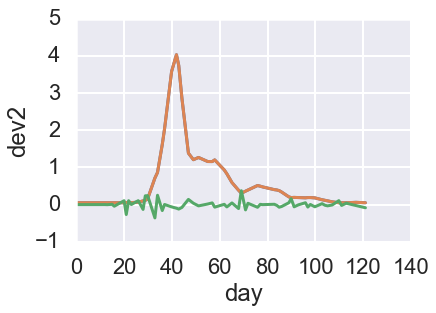

In [46]:
sns.lineplot(x=d.day, y=d.roll)
sns.lineplot(x=d.day, y=d.FL)
sns.lineplot(x=d.day, y=d.dev2)


In [47]:
d.index = d.day

In [48]:
d.FL.rolling(3).mean()

day
0.00           NaN
0.88           NaN
1.92      0.050000
5.11      0.050000
5.91      0.050000
7.10      0.050000
7.86      0.050000
8.80      0.050000
11.88     0.050000
12.89     0.050000
14.99     0.050000
15.87     0.050000
19.97     0.050000
20.88     0.051667
21.87     0.052778
23.00     0.053889
25.90     0.057556
27.91     0.072944
28.84     0.093278
29.83     0.123611
32.86     0.328444
33.95     0.578333
35.94     1.064833
36.89     1.505056
39.84     2.410056
41.87     3.214389
42.82     3.783833
44.16     3.543056
46.87     2.661056
48.95     1.815722
            ...   
62.94     0.987333
65.08     0.784167
67.85     0.602333
69.01     0.427667
70.75     0.350500
71.78     0.352667
75.78     0.422000
76.94     0.466500
77.86     0.494611
82.79     0.457611
83.85     0.423778
84.82     0.390333
85.84     0.369000
88.86     0.307333
89.84     0.245167
91.08     0.197056
92.90     0.190889
95.81     0.188389
96.80     0.186833
97.87     0.186778
99.74     0.186333
102.75  